<h1><b>CAR PRICE PREDICTION USING MACHINE LEARNING </b> </h1>

In [2]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='ZzE-ZnFteOilvsZbtzorb2NDcZCX-DpxoBBgCVBRSVyT',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.eu.cloud-object-storage.appdomain.cloud')

bucket = 'carpricepredictionwithmachinelear-donotdelete-pr-c2bub4vwlhlqop'
object_key = 'CarPrice_Assignment.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
df_data_1.describe(include='all').style.background_gradient(cmap='Blues').set_properties(**{'font-family':'Segoe UI'})

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205,205,205,205,205,205,205,205.000000,205.000000,205.000000,205.000000,205.000000,205,205,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
unique,nan,nan,147,2,2,2,5,3,2,nan,nan,nan,nan,nan,7,7,nan,8,nan,nan,nan,nan,nan,nan,nan,nan
top,nan,nan,toyota corona,gas,std,four,sedan,fwd,front,nan,nan,nan,nan,nan,ohc,four,nan,mpfi,nan,nan,nan,nan,nan,nan,nan,nan
freq,nan,nan,6,185,168,115,96,120,202,nan,nan,nan,nan,nan,148,159,nan,94,nan,nan,nan,nan,nan,nan,nan,nan
mean,103.000000,0.834146,nan,nan,nan,nan,nan,nan,nan,98.756585,174.049268,65.907805,53.724878,2555.565854,nan,nan,126.907317,nan,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,nan,nan,nan,nan,nan,nan,nan,6.021776,12.337289,2.145204,2.443522,520.680204,nan,nan,41.642693,nan,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,nan,nan,nan,nan,nan,nan,nan,86.600000,141.100000,60.300000,47.800000,1488.000000,nan,nan,61.000000,nan,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,nan,nan,nan,nan,nan,nan,nan,94.500000,166.300000,64.100000,52.000000,2145.000000,nan,nan,97.000000,nan,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,nan,nan,nan,nan,nan,nan,nan,97.000000,173.200000,65.500000,54.100000,2414.000000,nan,nan,120.000000,nan,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,nan,nan,nan,nan,nan,nan,nan,102.400000,183.100000,66.900000,55.500000,2935.000000,nan,nan,141.000000,nan,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000


array([[<AxesSubplot:title={'center':'car_ID'}>,
        <AxesSubplot:title={'center':'symboling'}>,
        <AxesSubplot:title={'center':'wheelbase'}>,
        <AxesSubplot:title={'center':'carlength'}>],
       [<AxesSubplot:title={'center':'carwidth'}>,
        <AxesSubplot:title={'center':'carheight'}>,
        <AxesSubplot:title={'center':'curbweight'}>,
        <AxesSubplot:title={'center':'enginesize'}>],
       [<AxesSubplot:title={'center':'boreratio'}>,
        <AxesSubplot:title={'center':'stroke'}>,
        <AxesSubplot:title={'center':'compressionratio'}>,
        <AxesSubplot:title={'center':'horsepower'}>],
       [<AxesSubplot:title={'center':'peakrpm'}>,
        <AxesSubplot:title={'center':'citympg'}>,
        <AxesSubplot:title={'center':'highwaympg'}>,
        <AxesSubplot:title={'center':'price'}>]], dtype=object)

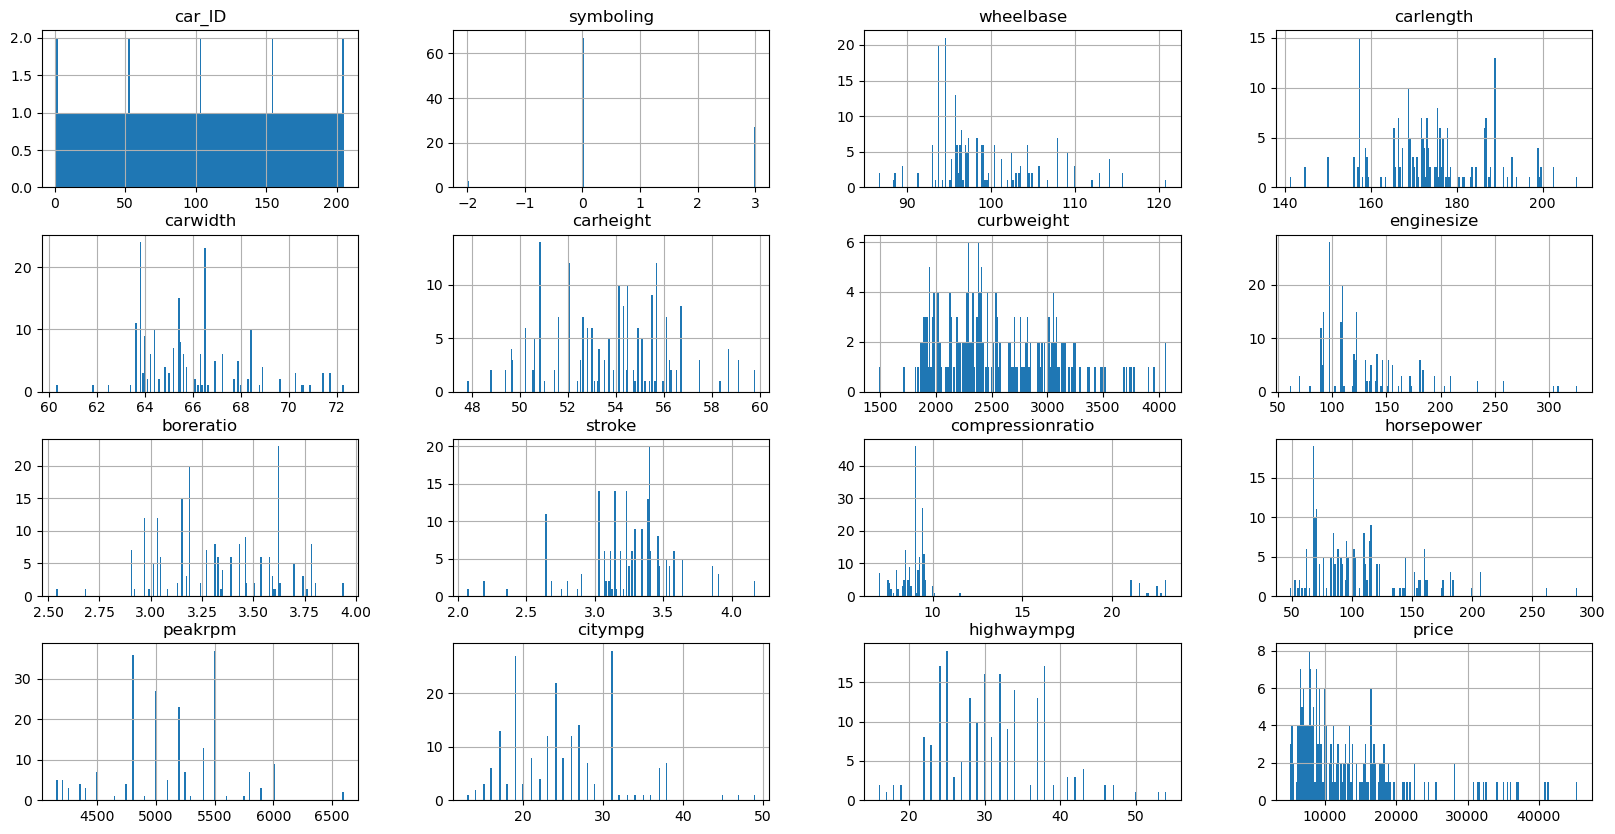

In [6]:
df_data_1.hist(bins=200,figsize=[20,10])

In [10]:
def pie_plot(df_data_1, cols_list, rows, cols):
    fig, axes = plt.subplots(rows, cols)
    for ax, col in zip(axes.ravel(), cols_list):
        df_data_1[col].value_counts().plot(ax=ax, kind='pie', figsize=(15, 15), fontsize=10, autopct='%1.0f%%')
        ax.set_title(str(col), fontsize = 12)
    plt.show()

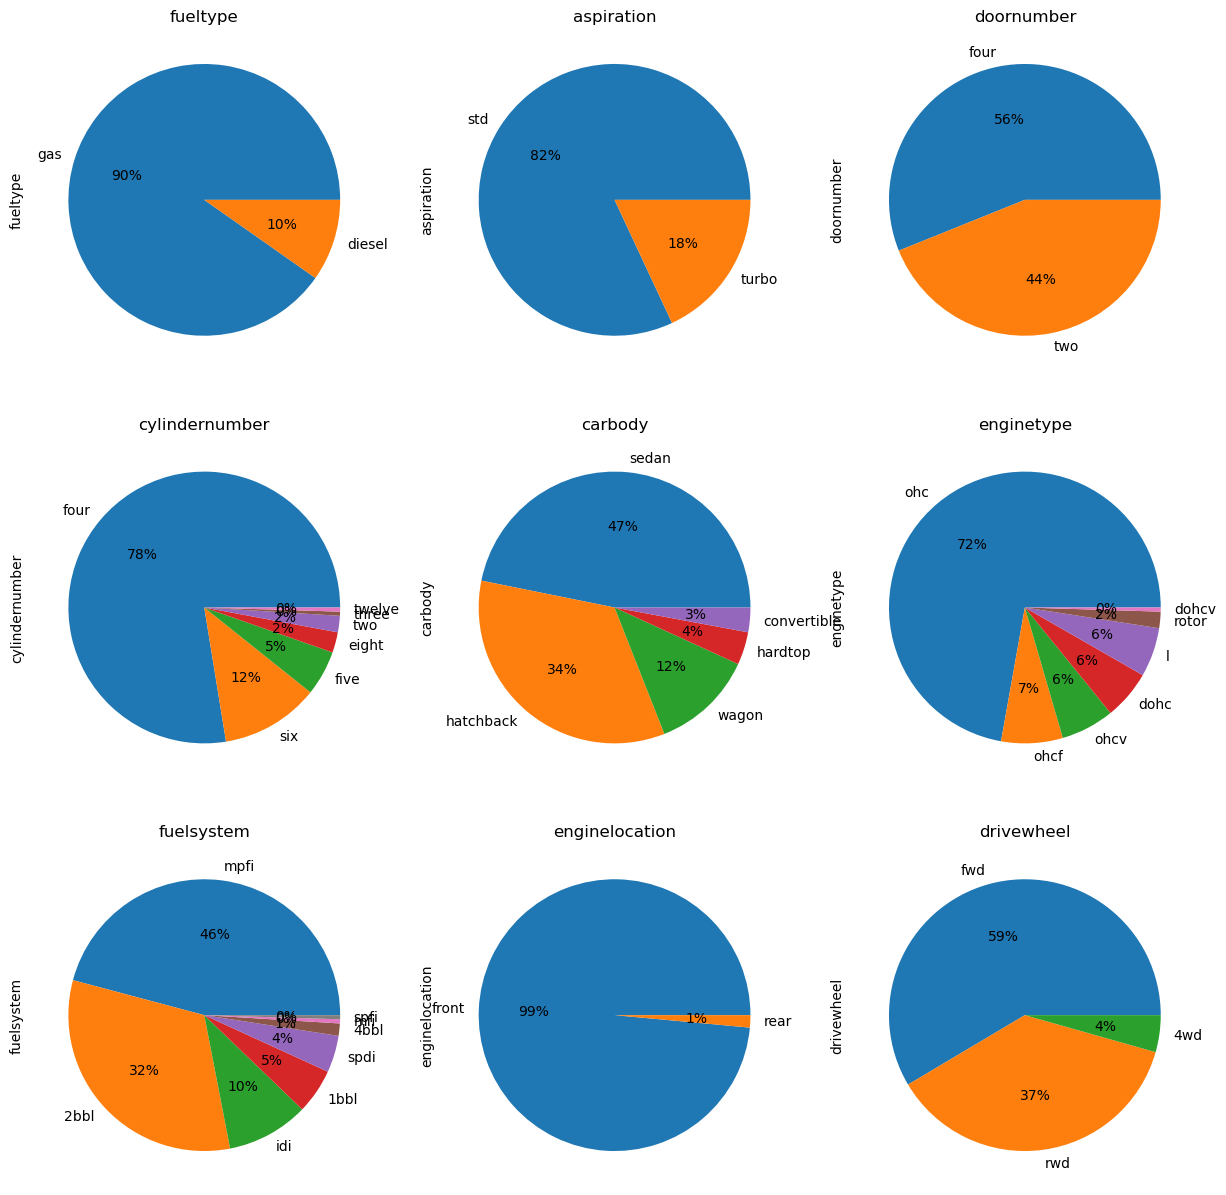

In [11]:
pie_plot(df_data_1, ['fueltype', 'aspiration', 'doornumber', 'cylindernumber', 'carbody', 'enginetype', 'fuelsystem', 'enginelocation', 'drivewheel'], 3, 3)

Checking for missing valuessns.heatmap(df.isnull())

<AxesSubplot:>

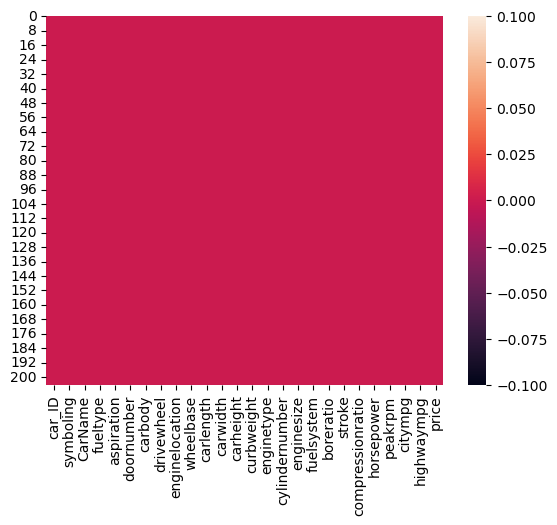

In [12]:
sns.heatmap(df_data_1.isnull())

Dropping duplicated if any exists

In [13]:
df_data_1_c = df_data_1.copy()

In [14]:
df_data_1_c = df_data_1_c.drop_duplicates()

In [15]:
print("Before dropping duplicates {} after dropping duplicates {}".format(df_data_1.shape[0], df_data_1_c.shape[0]))

Before dropping duplicates 205 after dropping duplicates 205


It's clear that our dataset doesn't contain any duplicates

In [16]:
df_data_1_c['doornumber'].replace({'two':2, 'four':4}, inplace=True)
df_data_1_c['cylindernumber'].replace({'two':2, 'three':3, 'four':4, 'five':5, 'six':6, 'eight':8, 'twelve':12}, inplace=True)

In [17]:
df_data_1_c = pd.get_dummies(df_data_1_c, columns = ['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem'])

In [18]:
car_names = df_data_1_c['CarName'].tolist()

In [19]:
unique_names = []
for car in car_names:
    unique_names.append(car.split()[0])
unique_names = set(unique_names)

In [20]:
for i, c in enumerate(df_data_1_c["CarName"]):
    for u in unique_names:
        if u in c:
            df_data_1_c['CarName'].iloc[i] = u

/tmp/wsuser/ipykernel_164/3456071485.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data_1_c['CarName'].iloc[i] = u


In [21]:
df_c = pd.get_dummies(df_data_1_c, columns = ['CarName'])

In [22]:
df_data_1_c.head()

,car_ID,symboling,CarName,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,alfa-romero,2,88.6,168.8,64.1,48.8,2548,4,...,0,0,0,0,0,0,0,1,0,0
1,2,3,alfa-romero,2,88.6,168.8,64.1,48.8,2548,4,...,0,0,0,0,0,0,0,1,0,0
2,3,1,alfa-romero,2,94.5,171.2,65.5,52.4,2823,6,...,1,0,0,0,0,0,0,1,0,0
3,4,2,audi,4,99.8,176.6,66.2,54.3,2337,4,...,0,0,0,0,0,0,0,1,0,0
4,5,2,audi,4,99.4,176.6,66.4,54.3,2824,5,...,0,0,0,0,0,0,0,1,0,0


Dealing with outliers

An outlier is an observation that lies an abnormal distance from other values in a random sample from a population. In a sense, this definition leaves it up to the analyst (or a consensus process) to decide what will be considered abnormal. Before abnormal observations can be singled out, it is necessary to characterize normal observations. Two activities are essential for characterizing a set of data:

Examination of the overall shape of the graphed data for important features, including symmetry and departures from assumptions.
Examination of the data for unusual observations that are far removed from the mass of data. These points are often referred to as outliers. Two graphical techniques for identifying outliers, scatter plots and box plots, along with an analytic procedure for detecting outliers when the distribution is normal (Grubbs' Test)

In [23]:
def box_plot(num_cols):
    plt.figure(figsize=(20, 15))
    for i in range(len(num_cols)):
        if i == 16:
            break
        else:
            plt.subplot(4,4, i+1)
            l = num_cols[i]
            sns.boxplot(df_data_1_c[l], palette="flare")

/opt/conda/envs/Python-3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/envs/Python-3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/envs/Python-3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warn

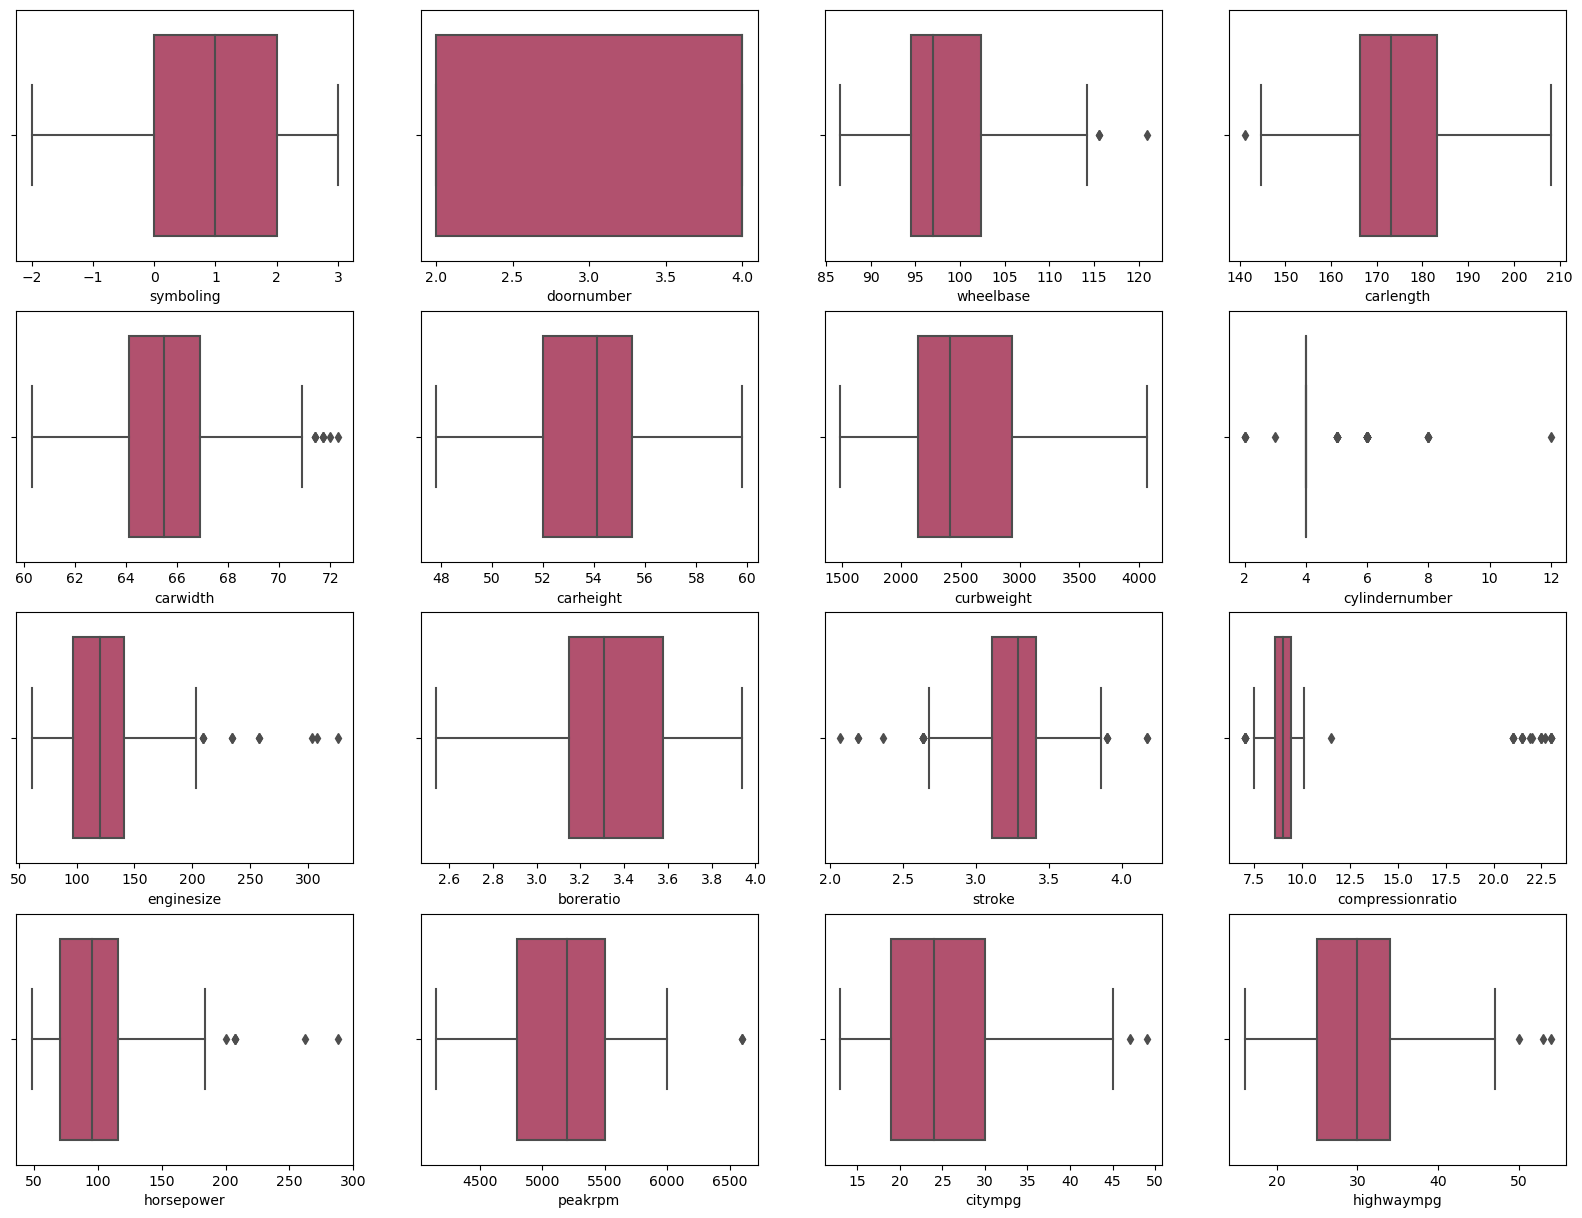

In [24]:
box_plot(['symboling','doornumber', 'wheelbase', 'carlength', 'carwidth'
                  , 'carheight', 'curbweight','cylindernumber', 'enginesize', 'boreratio'
                 ,'stroke','compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg'])

In [25]:
def corr(x, y, **kwargs):
    coef = np.corrcoef(x, y)[0][1]
    label = r'$\rho$ = ' + str(round(coef, 2))
    ax = plt.gca()
    ax.annotate(label, xy = (0.3, 1), size = 30, xycoords = ax.transAxes)

In [26]:
df_data_1_c.head()

,car_ID,symboling,CarName,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,alfa-romero,2,88.6,168.8,64.1,48.8,2548,4,...,0,0,0,0,0,0,0,1,0,0
1,2,3,alfa-romero,2,88.6,168.8,64.1,48.8,2548,4,...,0,0,0,0,0,0,0,1,0,0
2,3,1,alfa-romero,2,94.5,171.2,65.5,52.4,2823,6,...,1,0,0,0,0,0,0,1,0,0
3,4,2,audi,4,99.8,176.6,66.2,54.3,2337,4,...,0,0,0,0,0,0,0,1,0,0
4,5,2,audi,4,99.4,176.6,66.4,54.3,2824,5,...,0,0,0,0,0,0,0,1,0,0


In [27]:
def scatter_features(l):
    g = sns.PairGrid(df_c,y_vars='price',x_vars=df_c[l].columns, height=5)
    g.map(plt.scatter,color='darkred',alpha=0.2)
    g.map(corr)
    plt.show()

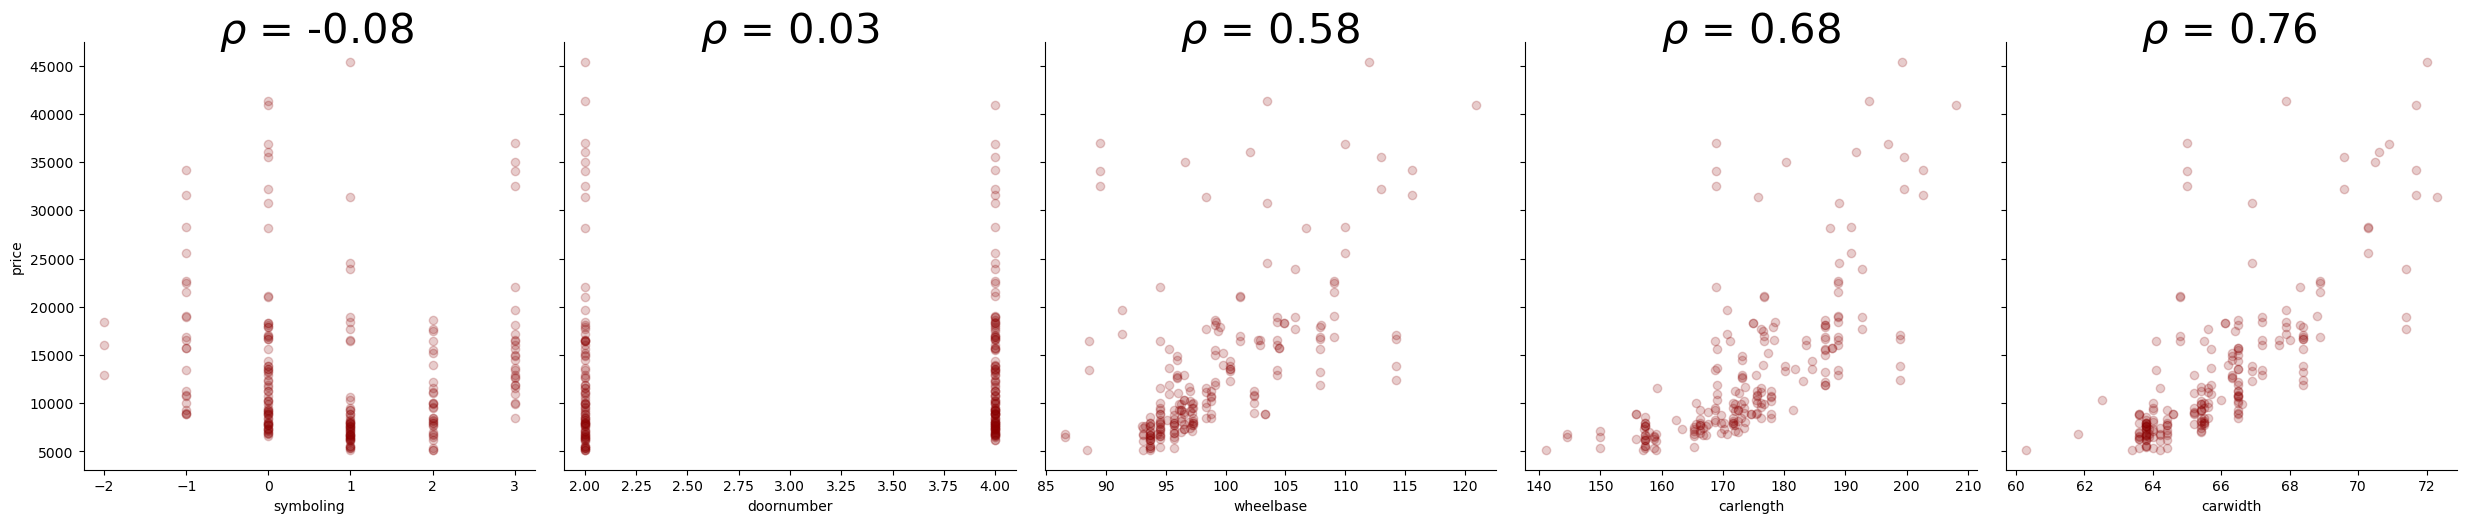

In [28]:
scatter_features(['symboling','doornumber', 'wheelbase', 'carlength', 'carwidth'])

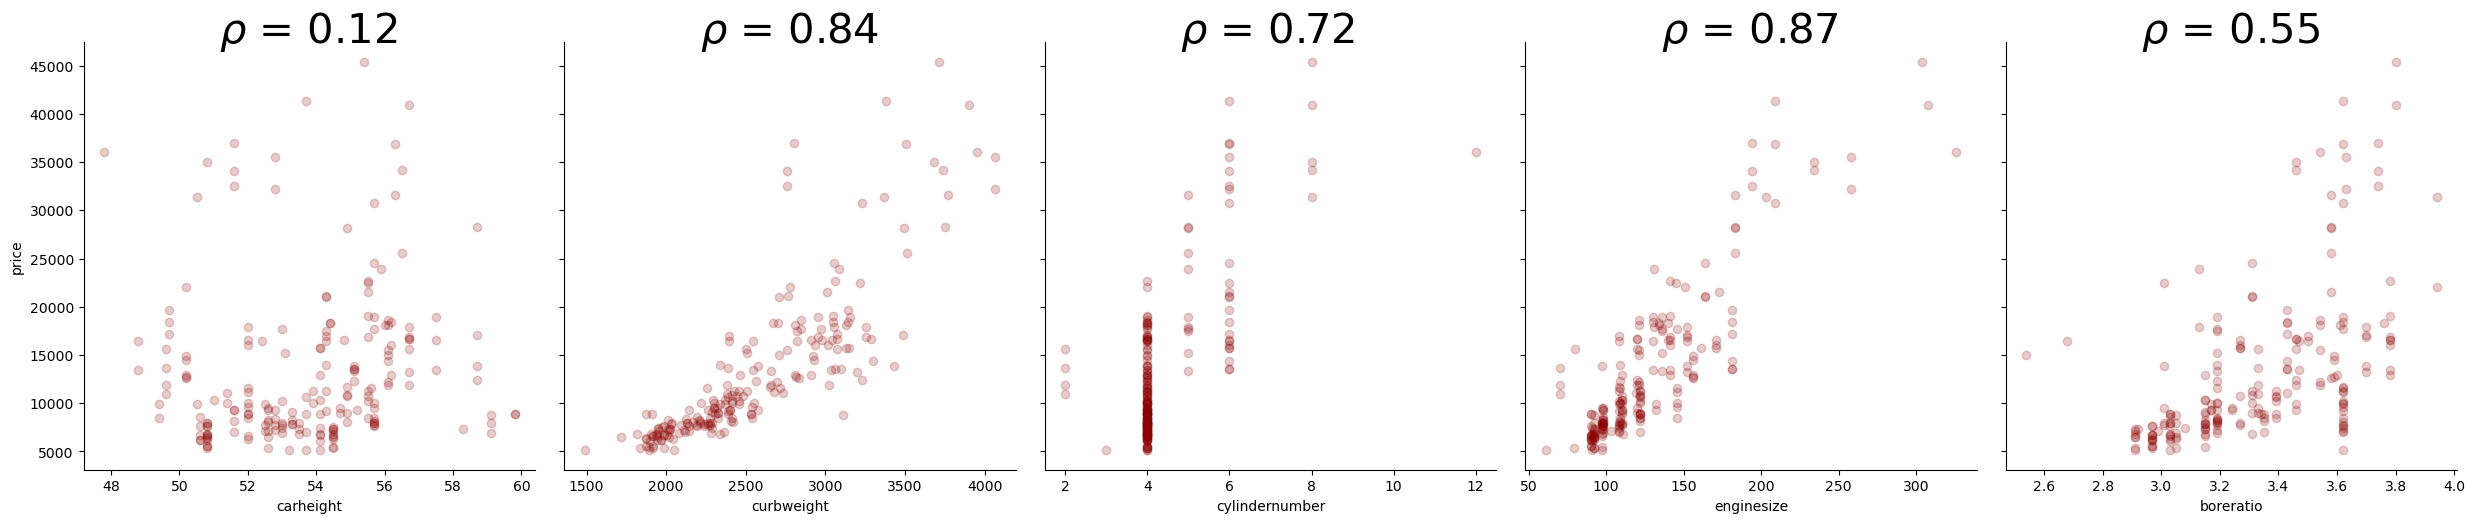

In [29]:
scatter_features(['carheight', 'curbweight','cylindernumber', 'enginesize', 'boreratio'])

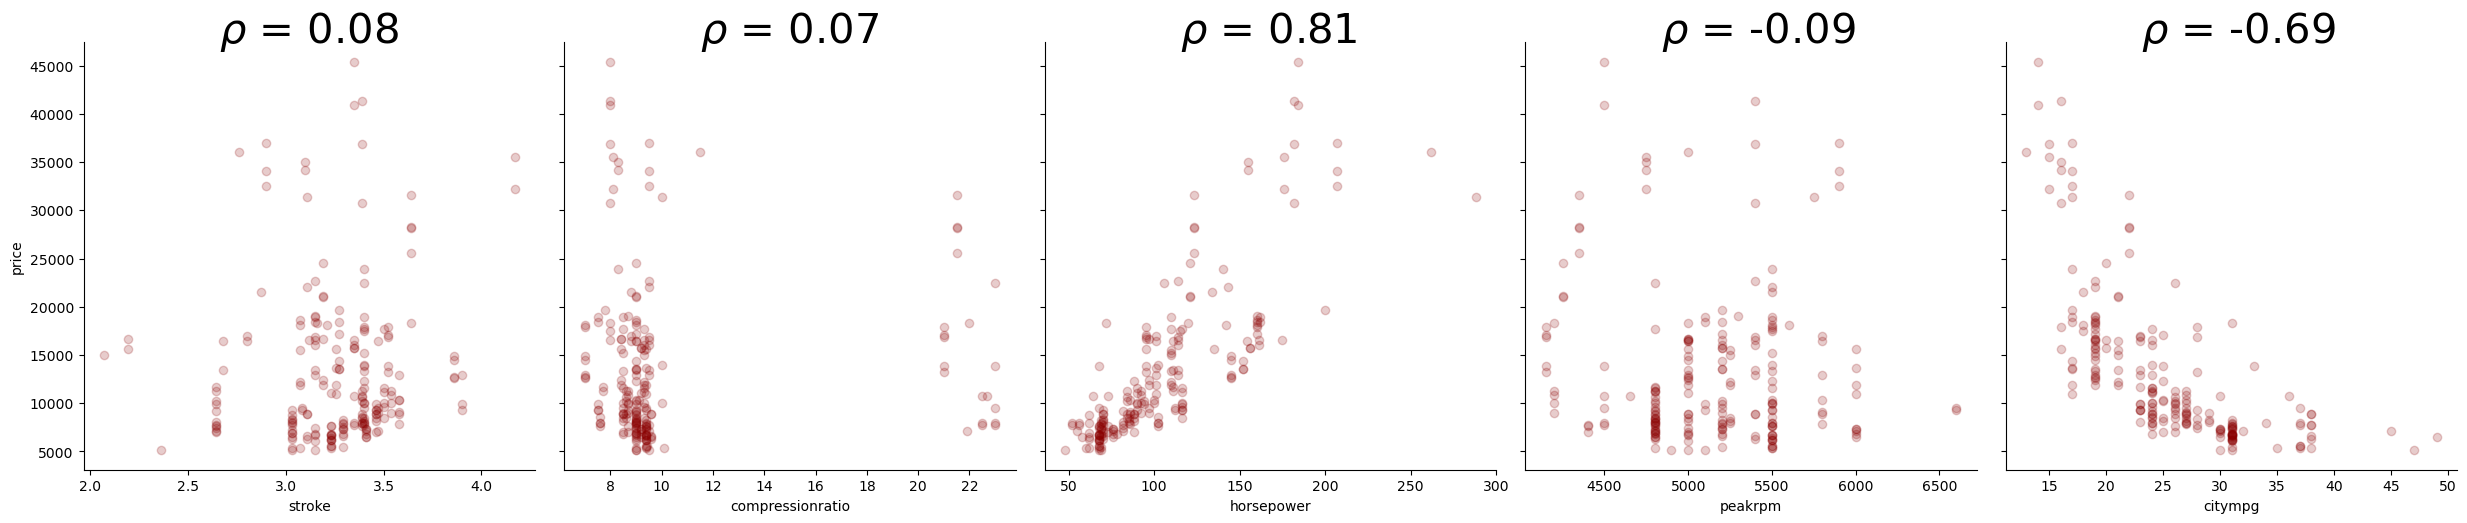

In [30]:
scatter_features(['stroke','compressionratio', 'horsepower', 'peakrpm', 'citympg'])

Checking multicollinearity with VIF
Multicollinearity occurs when there are two or more independent variables in a multiple regression model, which have a high correlation among themselves. When some features are highly correlated, we might have difficulty in distinguishing between their individual effects on the dependent variable. Multicollinearity can be detected using various techniques, one such technique being the Variance Inflation Factor(VIF).

In VIF method, we pick each feature and regress it against all of the other features. For each regression, the factor is calculated as :



Where, R-squared is the coefficient of determination in linear regression. Its value lies between 0 and 1.

As we see from the formula, greater the value of R-squared, greater is the VIF. Hence, greater VIF denotes greater correlation. This is in agreement with the fact that a higher R-squared value denotes a stronger collinearity. Generally, a VIF above 5 indicates a high multicollinearity.



In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_df = df_c.loc[:, df_c.columns != 'price']

vif_data = pd.DataFrame()
vif_data["feature"] = vif_df.columns
vif_data["VIF"] = [variance_inflation_factor(vif_df.values ,i) for i in range(len(vif_df.columns))]
vif_data.head(17)

/opt/conda/envs/Python-3.10/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,car_ID,738.507773
1,symboling,6.913552
2,doornumber,4.079685
3,wheelbase,20.542005
4,carlength,23.591722
5,carwidth,16.312116
6,carheight,8.538720
7,curbweight,42.153316
8,cylindernumber,29.426224
9,enginesize,64.268827


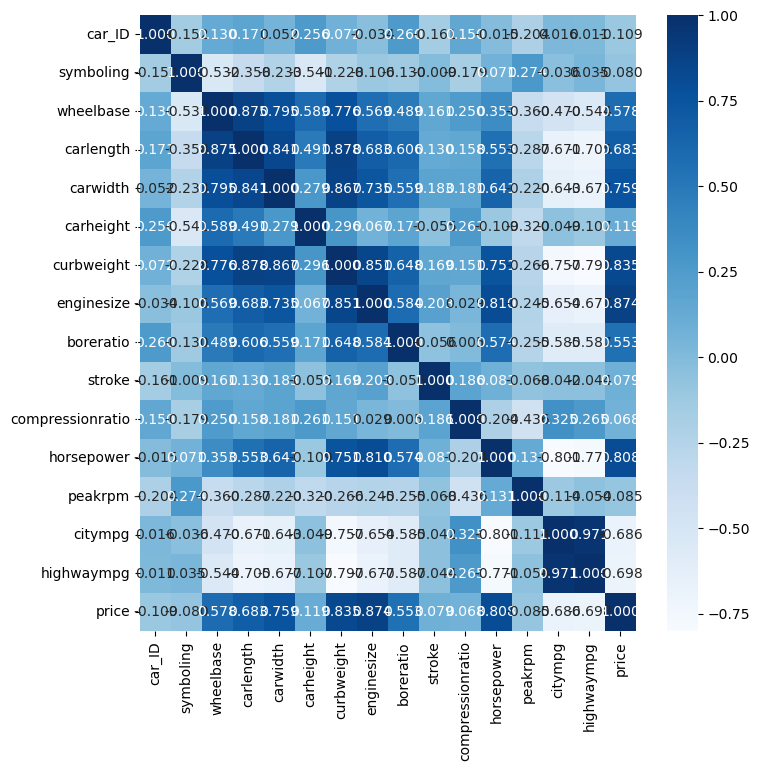

In [39]:
plt.figure(figsize=(8,8))
sns.heatmap(df_data_1.corr(),annot=True,cmap='Blues',fmt='.3f')
plt.show()